In [12]:
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

def show_image_gray(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

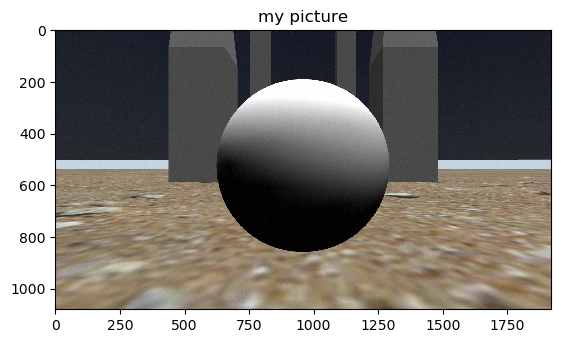

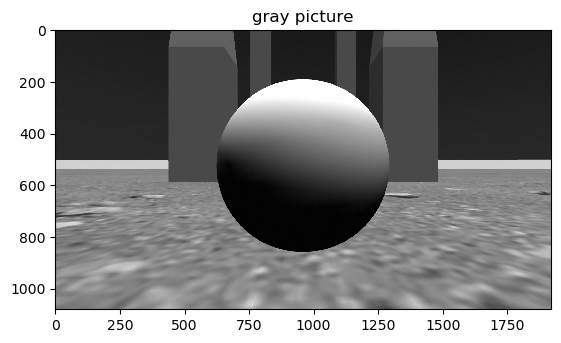

In [14]:
filename = '1.jpg'
img = cv.imread(filename)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_image(rgb, 'my picture')

gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
# Reduce the noise to avoid false circle detection
gray = cv.medianBlur(gray, 5)
show_image_gray(gray, 'gray picture')



In [15]:
rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=int(0.8*rows)
                            )
circles = np.array([]) if circles is None else circles
print(f"circles detected: {circles.shape}")

circles detected: (1, 17, 3)


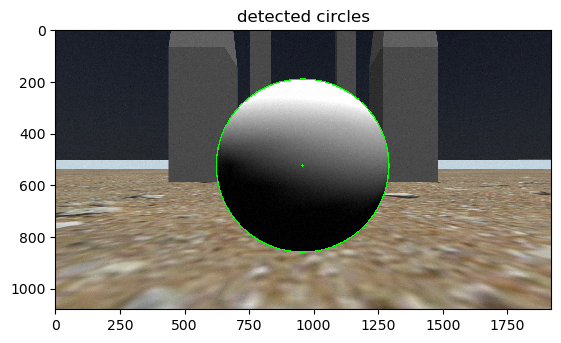

In [16]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    first_circle = circles[0, :][0]
    center = (first_circle[0], first_circle[1])
    radius = first_circle[2]
    cv.circle(rgb, center, radius, (0, 255, 0), 3)
    cv.circle(rgb, center, 2, (0, 255, 0), 3)
    show_image(rgb, 'detected circles')



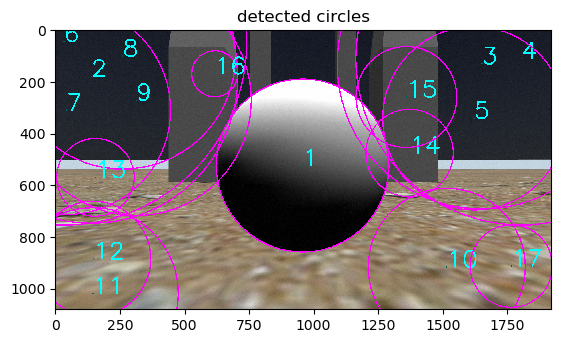

In [9]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i, circle in enumerate(circles[0, :], start=1):
        center = (circle[0], circle[1])
        # circle center
        cv.circle(rgb, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = circle[2]
        cv.circle(rgb, center, radius, (255, 0, 255), 3)
        # write index next to circle center
        cv.putText(rgb, str(i), (circle[0], circle[1]), cv.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 255), 5)
        

show_image(rgb, 'detected circles')